#**Predict Loan Eligibility for Dream Housing Finance company**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.



In [91]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
#Loading the dataset
loandata=pd.read_csv("/content/train_ctrUa4K.csv")

In [93]:
#Viewing first 5 observations
loandata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [94]:
#Finding number of rows and columns
loandata.shape

(614, 13)

There are 614 observations and 13 variables

In [95]:
#The column Loan_ID is not necessary for analysis therefore we can remove that variable
loandata.drop("Loan_ID",axis=1,inplace=True)

In [96]:
#Info of the variables
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


The variables Gender,Married,Dependents,Education,Self_Employed,Property_Area and Loan_Status are object type. Variables ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term and Credit_History are numerical value.

#Treating Missing Values

In [97]:
#Checking Whether missing values are present
loandata.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values are present in every columns except Education,Property_Area and Loan_status

In [98]:
#Treating missing values in Gender
loandata['Gender'].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

Since most of the obervations in Gender are Male we can replace the 13 missing values in Gender with Male

In [99]:
#Replacing Missing values in Gender with Male
loandata['Gender'].fillna(value='Male',inplace=True)

In [100]:
#Checking missing values
loandata.isna().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now the missing values in Gender are treated

In [101]:
#Treating missing values in Married
loandata['Married'].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

Since most of the observations in the variable Married are Yes we can replace missing values in it with Yes

In [102]:
#Replacing missing values with Yes
loandata['Married'].fillna(value='Yes',inplace=True)

In [103]:
#Checking whether missing values are replaced
loandata.isna().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values in Married are treated

In [104]:
#Treating missing values in Dependents
loandata['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [105]:
#Filling missing values with 0
loandata['Dependents'].fillna(value=0,inplace=True)

In [106]:
#Checking whether missing values are removed
loandata.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [107]:
#Treating Missing values in Self Employed
loandata['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [108]:
#Filling missing values with No
loandata['Self_Employed'].fillna(value='No',inplace=True)

In [109]:
#Checking whether missing observations in Self Employed are treated
loandata.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

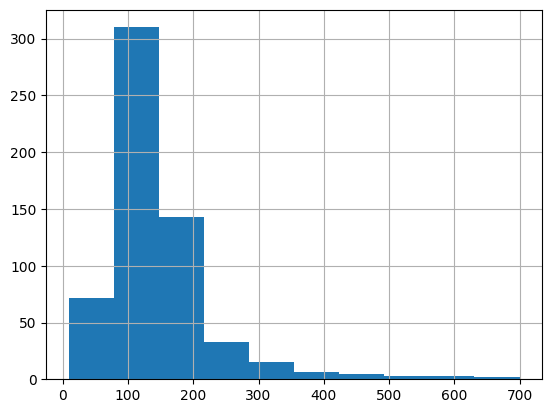

In [110]:
#Treating Missing Observations in LoanAmount
#Here we have Loan Amount which is a continuous numerical value so we can check the histogram to understand whether it is symmetric or not
loandata['LoanAmount'].hist()

In [111]:
#Checking Skewness
loandata['LoanAmount'].skew()

2.677551679256059

Here since skewness is greater than zero it is positively skewed therefore we can replace the missing observations in it with the median of the observations.

In [112]:
#Replacing Missing observation with Median
loandata['LoanAmount'].fillna(value=loandata['LoanAmount'].median(),inplace=True)

In [113]:
loandata.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [114]:
#Treating Missing values in Loan Amount Term
loandata['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

Since most of the observations in Loan Amount Term are 360 we can replace missing values in Loan_Amount_Term with 360

In [115]:
#Filling the missing value
loandata['Loan_Amount_Term'].fillna(360,inplace=True)

In [116]:
loandata.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [117]:
#Treating Missing values in Credit History
loandata['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

Replace missing values in credit history with 1

In [118]:
loandata['Credit_History'].fillna(1,inplace=True)

In [119]:
#Checking For Missing Values
loandata.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now we have treated all the missing values and there are no missing values remaining in the data

In [120]:
#In the Dependents column  we have an obeservation '3+' which can't be used in analysis so we can replace it with 3
loandata['Dependents']=loandata['Dependents'].replace("3+", 3)

In [121]:
loandata['Dependents']

0      0
1      1
2      0
3      0
4      0
      ..
609    0
610    3
611    1
612    2
613    0
Name: Dependents, Length: 614, dtype: object

#Descriptive Measures

In [122]:
#Summary Measures of the data which are numerical
loandata.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [123]:
#Summary Measures of the data which are Objective
loandata.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,5,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,345,480,532,233,422


#Encoding

In [124]:
#For encoding we can use the label encoding
from sklearn.preprocessing import LabelEncoder

In [125]:
le = LabelEncoder()

In [126]:
#Encoding Gender,Married,Education,Self employed,Property area and Loan status
loandata['Gender']=le.fit_transform(loandata['Gender'])
loandata['Married']=le.fit_transform(loandata['Married'])
loandata['Education']=le.fit_transform(loandata['Education'])
loandata['Self_Employed']=le.fit_transform(loandata['Self_Employed'])
loandata['Property_Area']=le.fit_transform(loandata['Property_Area'])
loandata['Loan_Status']=le.fit_transform(loandata['Loan_Status'])

In [127]:
#Viewing the data
loandata.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


Correlation Matrix for understanding linear relationship between variables

In [128]:
loandata[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383
LoanAmount,0.565181,0.189218,1.000000,0.036960
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000


<Axes: >

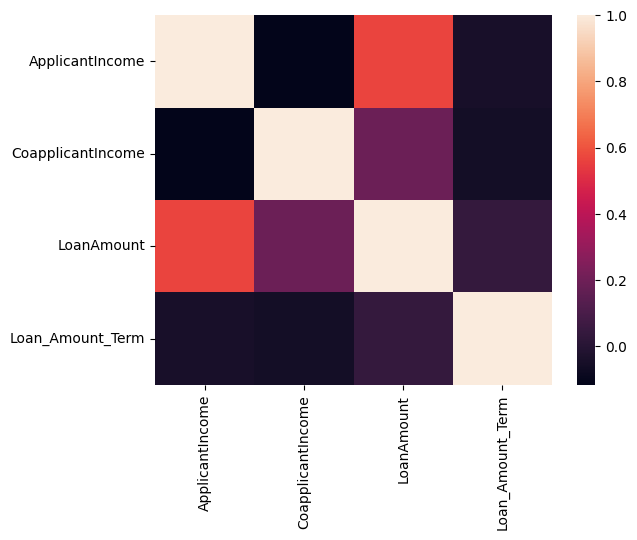

In [129]:
sns.heatmap(loandata[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]].corr())

From the correlation matrix there is no strong relationship between any variables

**Model Building**

In [130]:
#Now we can split the data into dependent and independent variables for performing model building
#Our aim is to find a model that best predicts the Loan Status
x=loandata.drop("Loan_Status",axis=1)
y=loandata['Loan_Status']

# Logistic Regression

Here we can use  the classification technique Logistic Regression for building the model

In [131]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='liblinear')

In [132]:
#Splitting the data into train and test by stratifying at the loan status
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, stratify=y, test_size=0.25)


In [133]:
#Fitting the model
log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_test)

In [134]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
confusion_matrix(y_test,log_pred)

array([[ 19,  29],
       [  1, 105]])

In [135]:
#Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,log_pred))
print("Precision:",precision_score(y_test,log_pred))
print("recall:",recall_score(y_test,log_pred))

Accuracy: 0.8051948051948052
Precision: 0.7835820895522388
recall: 0.9905660377358491


# KNN

Now i will be using the K Nearest Neighbour method for building the model

In [136]:
#Finding Optimal number of neighbours
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(15,30)

In [137]:
#Creating a loop to find accuracy of each number of neighbours
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric k')

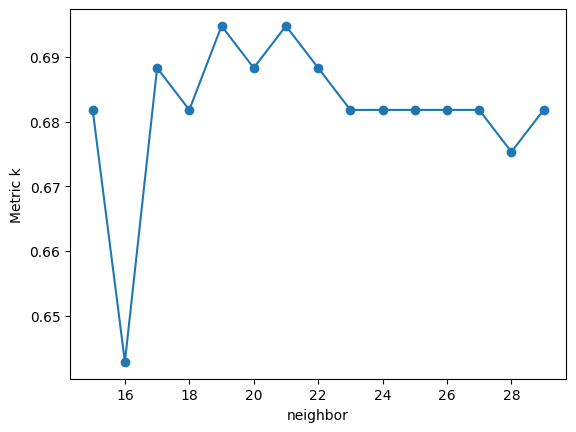

In [138]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("neighbor")
plt.ylabel("Metric k")

From the above plot we can see that the metric value is the highest when the number of neighbors is 18 or 19. Therefore we can set the number of neighbours to be 18.

In [139]:
classifier=KNeighborsClassifier(n_neighbors=18,metric="minkowski",p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)

In [140]:
#Evaluating the model
confusion_matrix(y_test,knn_pred)

array([[  4,  44],
       [  5, 101]])

In [141]:
# Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,knn_pred))
print("Precision:",precision_score(y_test,knn_pred))
print("recall:",recall_score(y_test,knn_pred))

Accuracy: 0.6818181818181818
Precision: 0.696551724137931
recall: 0.9528301886792453


# SVM

The next measure using for classification purpose is Support Vector Machine

In [142]:
#Importing the model
from sklearn.svm import SVC
sv_clf=SVC(kernel='poly')

In [143]:
#Fitting the model
sv_clf.fit(x_train,y_train)

SVC(kernel='poly')

In [144]:
#Predicting
y_pred=sv_clf.predict(x_test)

In [145]:
#Evaluating the model
confusion_matrix(y_test,y_pred)

array([[  0,  48],
       [  0, 106]])

In [146]:
# Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

Accuracy: 0.6883116883116883
Precision: 0.6883116883116883
recall: 1.0


# Decision Tree

Performing Decision Tree

In [147]:
#Importing and Fitting the model
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(max_depth=3)
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [148]:
#Evaluating the model
confusion_matrix(y_test,y_pred)

array([[ 19,  29],
       [  5, 101]])

In [149]:
#Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

Accuracy: 0.7792207792207793
Precision: 0.7769230769230769
recall: 0.9528301886792453


# Random Forest

In [150]:
#Importing the model
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [151]:
#Predicting
y_pred=rf_clf.predict(x_test)

In [152]:
#Evaluating the model
confusion_matrix(y_test,y_pred)

array([[22, 26],
       [ 9, 97]])

In [153]:
#Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

Accuracy: 0.7727272727272727
Precision: 0.7886178861788617
recall: 0.9150943396226415


# Performing Classification after Scaling

Now i am going to perform classification after scaling our values to check whether the accuracy of our models will improve after scaling the data. For scaling i will be using the standard scalar method

In [154]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [155]:
Apli_inc=sc.fit_transform(np.array(loandata['ApplicantIncome']).reshape(-1, 1))
loandata['ApplicantIncome']=pd.DataFrame(Apli_inc)

In [156]:
L_amt=sc.fit_transform(np.array(loandata['LoanAmount']).reshape(-1, 1))
loandata['LoanAmount']=pd.DataFrame(L_amt)

In [157]:
lmt=sc.fit_transform(np.array(loandata['Loan_Amount_Term']).reshape(-1, 1))
loandata['Loan_Amount_Term']=pd.DataFrame(lmt)

In [158]:
lmt=sc.fit_transform(np.array(loandata['CoapplicantIncome']).reshape(-1, 1))
loandata['CoapplicantIncome']=pd.DataFrame(lmt)

In [159]:
loandata.head(4)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.072991,-0.554487,-0.211241,0.273231,1.0,2,1
1,1,1,1,0,0,-0.134412,-0.038732,-0.211241,0.273231,1.0,0,0
2,1,1,0,0,1,-0.393747,-0.554487,-0.948996,0.273231,1.0,2,1
3,1,1,0,1,0,-0.462062,0.251980,-0.306435,0.273231,1.0,2,1


In [160]:
x=loandata.drop("Loan_Status",axis=1)
y=loandata['Loan_Status']

# Logistic Regression

In [161]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='liblinear')

In [162]:
#Splitting the data into train and test by stratifying at the loan status
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, stratify=y, test_size=0.25)


In [163]:
#Fitting the model
log_reg.fit(x_train,y_train)
log_pred=log_reg.predict(x_test)

In [164]:
#Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
confusion_matrix(y_test,log_pred)

array([[ 21,  27],
       [  2, 104]])

In [165]:
#Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,log_pred))
print("Precision:",precision_score(y_test,log_pred))
print("recall:",recall_score(y_test,log_pred))

Accuracy: 0.8116883116883117
Precision: 0.7938931297709924
recall: 0.9811320754716981


# KNN

In [166]:
#Finding Optimal number of neighbours
from sklearn.neighbors import KNeighborsClassifier
metric_k=[]
neighbors=np.arange(3,10)

In [167]:
#Creating a loop to find accuracy of each number of neighbours
for k in neighbors:
  classifier=KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(x_train,y_train)
  knn_pred=classifier.predict(x_test)
  accuracy=accuracy_score(y_test,knn_pred)
  metric_k.append(accuracy)

Text(0, 0.5, 'Metric k')

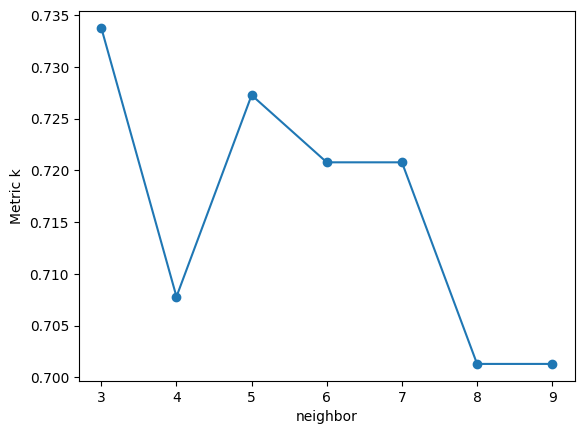

In [168]:
plt.plot(neighbors,metric_k,"o-")
plt.xlabel("neighbor")
plt.ylabel("Metric k")

We get the highest matric value when the number of neighbor is 7

In [169]:
classifier=KNeighborsClassifier(n_neighbors=7,metric="minkowski",p=2)
classifier.fit(x_train,y_train)
knn_pred=classifier.predict(x_test)

In [170]:
#Evaluating the model
confusion_matrix(y_test,knn_pred)

array([[14, 34],
       [ 9, 97]])

In [171]:
# Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,knn_pred))
print("Precision:",precision_score(y_test,knn_pred))
print("recall:",recall_score(y_test,knn_pred))

Accuracy: 0.7207792207792207
Precision: 0.7404580152671756
recall: 0.9150943396226415


# SVM

In [172]:
#Fitting the model
sv_clf.fit(x_train,y_train)

SVC(kernel='poly')

In [173]:
#Predicting
y_pred=sv_clf.predict(x_test)

In [174]:
#Evaluating the model
confusion_matrix(y_test,y_pred)

array([[ 13,  35],
       [  4, 102]])

In [175]:
# Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

Accuracy: 0.7467532467532467
Precision: 0.7445255474452555
recall: 0.9622641509433962


# Decision Tree

Performing Decision Tree

In [177]:
#Importing and Fitting the model
dt_clf.fit(x_train,y_train)
y_pred=dt_clf.predict(x_test)

In [178]:
#Evaluating the model
confusion_matrix(y_test,y_pred)

array([[ 22,  26],
       [  6, 100]])

In [179]:
#Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

Accuracy: 0.7922077922077922
Precision: 0.7936507936507936
recall: 0.9433962264150944


#Random Forest

In [180]:
#Fitting the model
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [181]:
#Predicting
y_pred=rf_clf.predict(x_test)

In [182]:
#Evaluating the model
confusion_matrix(y_test,y_pred)

array([[ 21,  27],
       [  5, 101]])

In [183]:
#Evaluation Measures
print("Accuracy:" , accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred))

Accuracy: 0.7922077922077922
Precision: 0.7890625
recall: 0.9528301886792453


#Finding the Best Model

In [184]:
#Creating a table
table=pd.DataFrame({'Method':['LogReg','KNN','SVM','Decision Tree','Rand For','Scal-LogReg','Scal-KNN','Scal-SVM','Scal-Decision Tree','Scal-Rand For'],
              'Accuracy':[0.8051948051948052,0.681818181818181,0.6883116883116883,0.7792207792207793,0.7727272727272727,0.8116883116883117,0.7207792207792207,0.7467532467532467,0.7922077922077922,0.7922077922077922]})

In [186]:
table.sort_values(by='Accuracy',ascending=False)

,Method,Accuracy
5,Scal-LogReg,0.811688
0,LogReg,0.805195
8,Scal-Decision Tree,0.792208
9,Scal-Rand For,0.792208
3,Decision Tree,0.779221
4,Rand For,0.772727
7,Scal-SVM,0.746753
6,Scal-KNN,0.720779
2,SVM,0.688312
1,KNN,0.681818


Here we get the best classification as Scaled Logistic Regression since its accuracy is the highest among all other models